In [1]:
import smote_variants as sv

In [2]:
import pandas  as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import plotly.express as px

In [6]:
import numpy as np

In [7]:
from sklearn import metrics

In [8]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
from sklearn.metrics import accuracy_score, precision_score

In [10]:
from sklearn.metrics import classification_report

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
from sklearn import metrics

In [13]:
from sklearn.metrics import roc_curve

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
%matplotlib inline
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
from sklearn.linear_model import LogisticRegression 

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
import tensorflow.keras

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense

In [26]:
df_train = pd.read_csv('dataset_sdn.csv')

In [27]:
df = df_train.copy()

In [28]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [29]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [30]:
df.drop([ 'dt', 'src', 'dst', 'dur', 'dur_nsec', 'Protocol'],axis=1,inplace=True)

In [31]:
df.head()

,switch,pktcount,bytecount,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0


,switch,pktcount,bytecount,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,1.010000e+11,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,2.810000e+11,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0


In [32]:
df.isnull().sum()

switch           0
pktcount         0
bytecount        0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

switch           0
pktcount         0
bytecount        0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

switch         0
pktcount       0
bytecount      0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

switch         0
pktcount       0
bytecount      0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

C:\Users\karpa\AppData\Local\Temp\ipykernel_13476\1612184941.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['label']).plot.bar()
C:\Users\karpa\AppData\Local\Temp\ipykernel_13476\1612184941.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['label']).plot.bar()


label
0    63335
1    40504
Name: count, dtype: int64

label
0    63335
1    40504
Name: count, dtype: int64

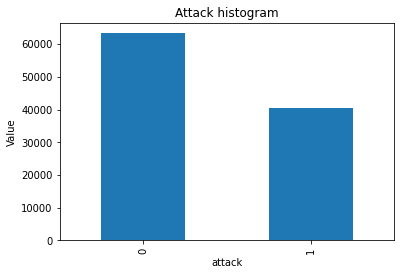

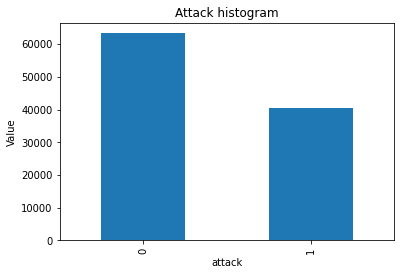

In [35]:
pd.value_counts(df['label']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['label'].value_counts()

In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [37]:
accuracy_list = []

In [38]:
def classif_results(): 
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="d")
    plt.show()
    accu = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accu)
    print("Accuracy", accu)

    
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score: ")
    print(auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plot_roc_curve(fpr, tpr)

In [43]:
import os

In [44]:
os.environ['OMP_NUM_THREADS']='1'

In [45]:
def test_scale():
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

In [46]:
X = df.iloc[:, df.columns != 'label']
y = df.iloc[:, df.columns == 'label']
X, y = SMOTE().fit_resample(X, y)

AttributeError: 'NoneType' object has no attribute 'split'

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
type(y)

In [ ]:
y.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
sc_X = StandardScaler()

In [ ]:
X_train = sc_X.fit_transform(X_train)

In [ ]:
X_test = sc_X.transform(X_test)

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = KNeighborsClassifier()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = SVC()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

In [ ]:
test_scale()

In [ ]:
classifier = GaussianNB()

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
classif_results()

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

In [ ]:
y_pred = classifier.predict(X_test) > 0.5

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
classif_results()

In [ ]:
accuracy_list

In [ ]:
accuracy_list = [["Logistic Regression ", 74.82], ['SVC', 97.29], ['Gaussian Naïve Bayes',69.34], ['Neural Network',97.76]]

In [ ]:
df_accuracy = pd.DataFrame(accuracy_list, columns=["Classifier", "Accuracy"])

In [ ]:
df_accuracy

In [ ]:
px.bar(df_accuracy, x=df_accuracy["Classifier"], y=df_accuracy["Accuracy"], color=df_accuracy["Classifier"])